# Hypothesis testing

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# import microsoft.csv, and add a new feature - logreturn
ms = pd.read_csv('../data/microsoft.csv')
ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])
ms

,Date,Open,High,Low,Close,Adj Close,Volume,logReturn
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500,0.006652
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900,-0.009238
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900,-0.014786
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900,0.012625
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100,0.028994
...,...,...,...,...,...,...,...,...
775,2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,0.024182
776,2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,-0.007925
777,2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,-0.026663
778,2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,-0.042058


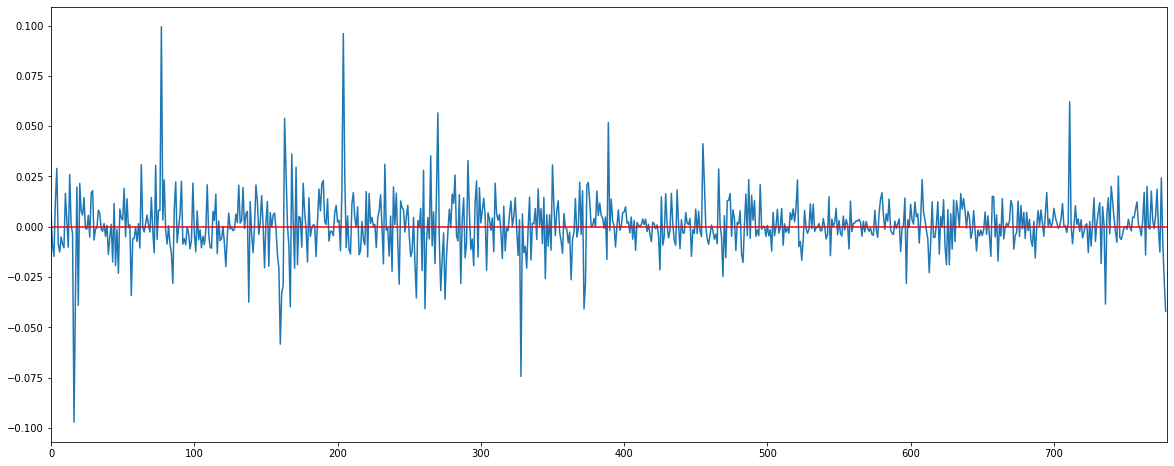

In [6]:
# Log return goes up and down during the period
ms['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

## Steps involved in testing a claim by hypothesis testing

### Step 1: Set hypothesis

$H_0 : \mu = 0$ 
$H_a : \mu \neq 0$

H0 means the average stock return is 0
H1 means the average stock return is not equal to 0

### Step 2: Calculate test statistic

In [8]:
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]
print((sample_mean, sample_std))

(0.0008202314861230223, 0.01419189738873751)


In [9]:
# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

1.614147714000367


### Step 3: Set desicion criteria

In [15]:
# confidence level
alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.9599639845400545 1.9599639845400545


### Step 4:  Make decision - shall we reject H0?

In [16]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: False


## Try one tail test by yourself ! 

$H_0 : \mu \leq 0$ 
$H_a : \mu > 0$

In [17]:
# step 2
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1)
n = ms['logReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

1.614147714000367


** Expected output: ** 1.6141477140003675

In [18]:
# step 3
alpha = 0.05

zright = norm.ppf(1-alpha, 0, 1)
print(zright)

1.6448536269514722


** Expected output: ** 1.64485362695

In [19]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

At significant level of 0.05, shall we reject: False


** Expected output: ** At significant level of 0.05, shall we reject: False

# An alternative method: p-value

In [14]:
# step 3 (p-value)
p = 1 - norm.cdf(zhat, 0, 1)
print(p)

0.053247694997


In [15]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

At significant level of 0.05, shall we reject: False
